In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Importar e Preparar os Dados

In [2]:
url = 'https://raw.githubusercontent.com/LuizFelipeAG/awaritasks/main/calculadora_aluguel/manipulacao/dados_aluguel_ml_rj_preprocessado.csv'

In [3]:
data = pd.read_csv(url)
data.head()

,zona,enderecos_lista,latitude,longitude,area,quartos,aluguel
0,centro,"Rua Senador Dantas, Centro, Rio de Janeiro, RJ",-22.91041,-43.17737,50.0,1.0,970
1,centro,"Rua Das Marrecas, Centro, Rio de Janeiro, RJ",-22.91230,-43.17794,28.0,1.0,1224
2,centro,"Rua De Santana, Centro, Rio de Janeiro, RJ",-22.90892,-43.19369,38.0,1.0,1000
3,centro,"Rua Riachuelo, Centro, Rio de Janeiro, RJ",-22.91353,-43.18043,62.0,2.0,2200
4,centro,"Rua João Neves Da Fontoura, Centro, Rio de Jan...",-22.91777,-43.69936,48.0,2.0,1001


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1344.0,-22.931363,0.041424,-23.01821,-22.96364,-22.92195,-22.913220,-22.79882
longitude,1344.0,-43.256435,0.092833,-43.69936,-43.32516,-43.21966,-43.180568,-43.16093
area,1344.0,138.544643,173.341891,18.00000,53.75000,77.00000,134.000000,1299.00000
quartos,1101.0,2.057221,0.900200,1.00000,1.00000,2.00000,3.000000,6.00000
aluguel,1344.0,5125.079613,10142.633778,500.00000,1343.50000,2200.00000,3915.000000,103929.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   latitude         1344 non-null   float64
 3   longitude        1344 non-null   float64
 4   area             1344 non-null   float64
 5   quartos          1101 non-null   float64
 6   aluguel          1344 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 73.6+ KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(data, test_size=0.25, random_state=123, stratify=data['zona'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 893 to 232
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1008 non-null   object 
 1   enderecos_lista  1008 non-null   object 
 2   latitude         1008 non-null   float64
 3   longitude        1008 non-null   float64
 4   area             1008 non-null   float64
 5   quartos          816 non-null    float64
 6   aluguel          1008 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 63.0+ KB


In [9]:
train['zona'].value_counts()

zona-sul      252
zona-norte    252
centro        252
zona-oeste    252
Name: zona, dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1091 to 487
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             336 non-null    object 
 1   enderecos_lista  336 non-null    object 
 2   latitude         336 non-null    float64
 3   longitude        336 non-null    float64
 4   area             336 non-null    float64
 5   quartos          285 non-null    float64
 6   aluguel          336 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 21.0+ KB


In [11]:
test['zona'].value_counts()

zona-sul      84
centro        84
zona-norte    84
zona-oeste    84
Name: zona, dtype: int64

In [12]:
test.head()

,zona,enderecos_lista,latitude,longitude,area,quartos,aluguel
1091,zona-sul,"Avenida Niemeyer, São Conrado, Rio de Janeiro, RJ",-22.99686,-43.27146,79.0,2.0,2700
1038,zona-sul,"Rua Visconde De Pirajá, Ipanema, Rio de Janeir...",-22.98429,-43.20492,70.0,2.0,3800
1290,zona-sul,"Rua Macedo Sobrinho, Humaitá, Rio de Janeiro, RJ",-22.95798,-43.19886,84.0,2.0,3500
1325,zona-sul,"Rua Da Passagem, Botafogo, Rio de Janeiro, RJ",-22.95354,-43.18153,50.0,1.0,3140
920,zona-norte,"Rua Pereira Nunes, Vila Isabel, Rio de Janeiro...",-22.91574,-43.24055,80.0,2.0,1700


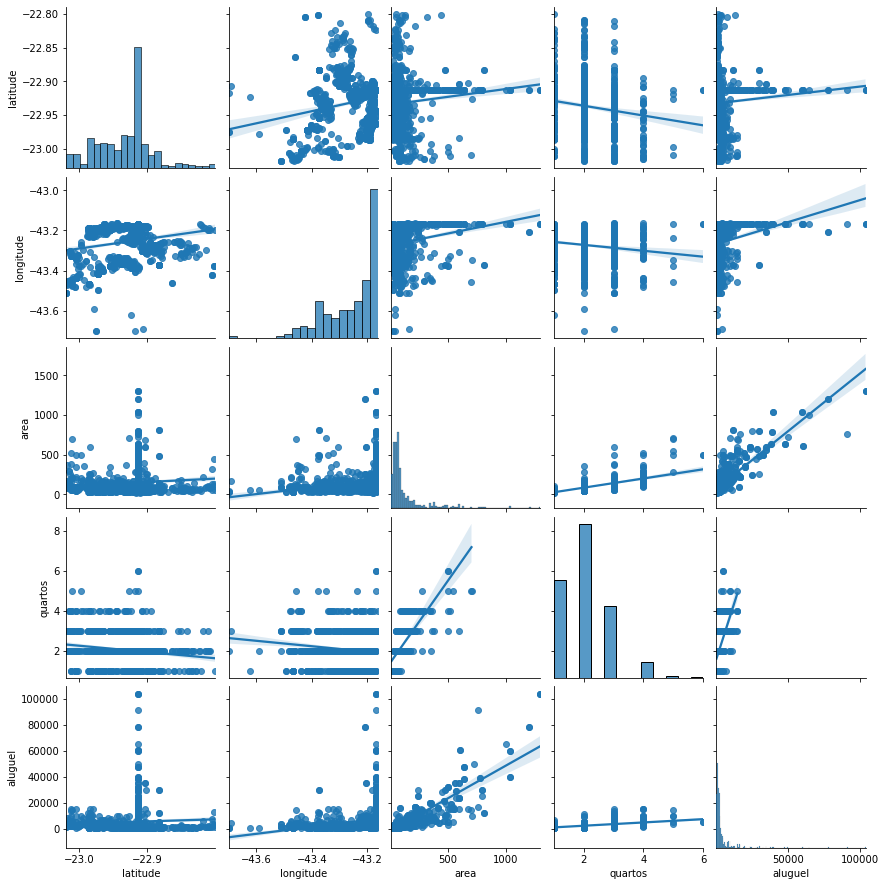

In [13]:
sns.pairplot(train, kind='reg')

In [14]:
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)

<ipython-input-14-e6efbadd8df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['aluguel']=train['aluguel'].apply(np.log1p)
<ipython-input-14-e6efbadd8df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['area']=train['area'].apply(np.log1p)


In [15]:
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

<ipython-input-15-9818456c3c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['aluguel']=test['aluguel'].apply(np.log1p)
<ipython-input-15-9818456c3c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['area']=test['area'].apply(np.log1p)


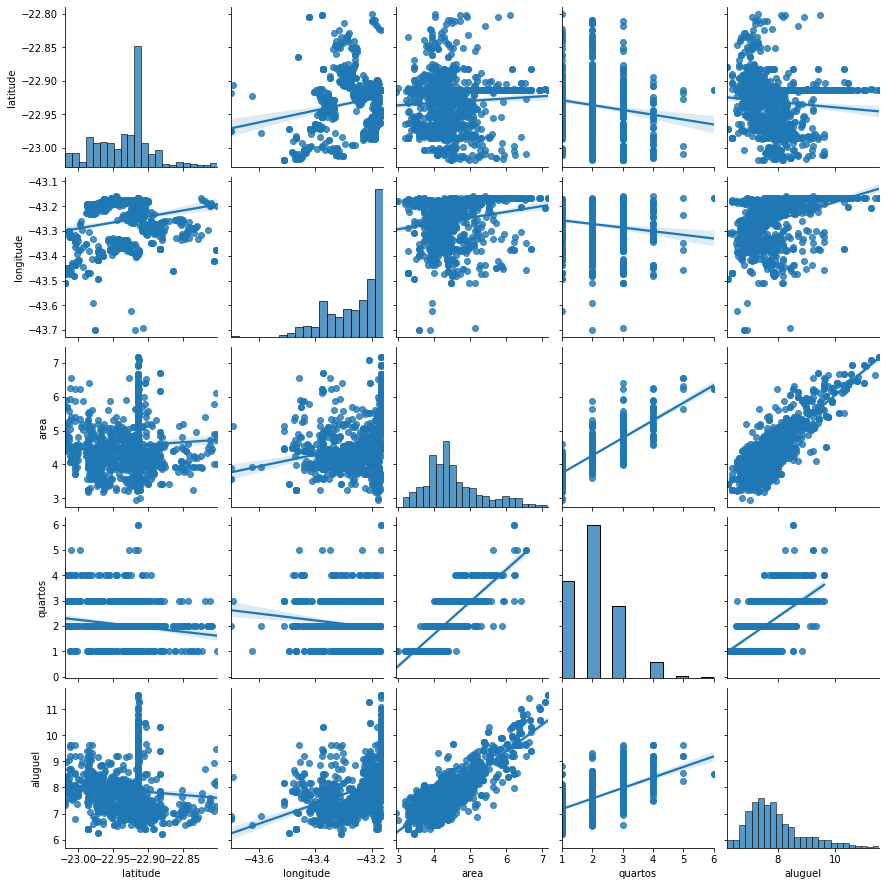

In [16]:
sns.pairplot(train, kind='reg')

In [17]:
X_cols = ['zona', 'latitude', 'longitude', 'area', 'quartos']
#X_cols = ['zona', 'area', 'quartos']
y_col = ['aluguel']

In [18]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [19]:
X_train.head()

,zona,latitude,longitude,area,quartos
893,zona-norte,-22.89762,-43.29822,3.931826,1.0
284,centro,-22.91336,-43.16879,7.170120,NaN
49,centro,-22.91353,-43.18043,4.330733,2.0
1276,zona-sul,-22.95067,-43.19280,4.948760,3.0
791,zona-norte,-22.92048,-43.21906,4.465908,2.0


In [20]:
# Tratar colunas categoricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [21]:
X_train.head()

,latitude,longitude,area,quartos,zona_centro,zona_zona-norte,zona_zona-oeste,zona_zona-sul
893,-22.89762,-43.29822,3.931826,1.0,0,1,0,0
284,-22.91336,-43.16879,7.170120,NaN,1,0,0,0
49,-22.91353,-43.18043,4.330733,2.0,1,0,0,0
1276,-22.95067,-43.19280,4.948760,3.0,0,0,0,1
791,-22.92048,-43.21906,4.465908,2.0,0,1,0,0


In [22]:
# Tratar valores ausente
# Importante: Usar informações do conjunto de treino
train_medians = X_train.median()
X_train=X_train.fillna(train_medians)
X_test=X_test.fillna(train_medians)

In [23]:
X_train.head()

,latitude,longitude,area,quartos,zona_centro,zona_zona-norte,zona_zona-oeste,zona_zona-sul
893,-22.89762,-43.29822,3.931826,1.0,0,1,0,0
284,-22.91336,-43.16879,7.170120,2.0,1,0,0,0
49,-22.91353,-43.18043,4.330733,2.0,1,0,0,0
1276,-22.95067,-43.19280,4.948760,3.0,0,0,0,1
791,-22.92048,-43.21906,4.465908,2.0,0,1,0,0


## 2. Machine Learning
### 2.1 Definição de Métrica
Métricas para regressão:
- Mean Absolute Error
- Mean Squared Error
- R2 Score
- Root Mean Squared Error



### 2.2 Modelo Base

In [24]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
y_pred = neigh.predict(X_test)

In [26]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.3777459453594127

In [27]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

0.1426919992354764

In [28]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.29585701139263265

In [29]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8311639789111666

## 3. Triagem com Outros Modelos

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.8291507296373531

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9929914402413127
Test score 0.7871734985776033
Treinando RandomForestRegressor


<ipython-input-31-61f5f9d552ee>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


Train score 0.9798014860946083
Test score 0.8775743791655184
Treinando MLPRegressor


C:\Users\Lipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train score 0.8032605338445589
Test score 0.8142887679921436
Treinando XGBRegressor
Train score 0.9858271860422979
Test score 0.8829853217709748


In [32]:
len(X_train)//3

336

In [33]:
X1=X_train[:336]
X2=X_train[336:2*336]
X3=X_train[2*336:]

In [34]:
# Repetindo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=3)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9929914402413127
Validation score [0.77407903 0.84025301 0.79403572]
Test score 0.7794401748443193
Treinando RandomForestRegressor
Train score 0.97940591051261
Validation score [0.85327826 0.88112294 0.86556856]
Test score 0.8777448139888917
Treinando MLPRegressor
Train score 0.7225684315008627
Validation score [0.7961099  0.73913003 0.82091469]
Test score 0.7213014849548447
Treinando XGBRegressor
Train score 0.9858271860422979
Validation score [0.8342775  0.86289873 0.85895604]
Test score 0.8829853217709748


In [35]:
# TODO: Calibração de modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8,9],
             'n_estimators':[50, 100, 150, 151, 152, 153, 154, 155, 160, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [36]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 151}

In [37]:
reg = gs.best_estimator_

In [38]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.9687153506430963
Validation score [0.85344671 0.87763306 0.8712658 ]
Test score 0.8879939948180623


In [39]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

## and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)